In [112]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics

In [113]:
import pandas as pd
data = pd.read_csv('https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv')

# Prepare Data

In [114]:
train = data.sample(frac=0.8,random_state=200)
test = data.drop(train.index)

,sepal.length,sepal.width,petal.length,petal.width,variety
1,4.9,3.0,1.4,0.2,Setosa
7,5.0,3.4,1.5,0.2,Setosa
14,5.8,4.0,1.2,0.2,Setosa
16,5.4,3.9,1.3,0.4,Setosa
23,5.1,3.3,1.7,0.5,Setosa


In [116]:
versicolorDF = train.loc[train['variety'] == 'Versicolor'].drop('variety', axis=1)
virginicaDF = train.loc[train['variety'] == 'Virginica'].drop('variety', axis=1)
setosaDF = train.loc[train['variety'] == 'Setosa'].drop('variety', axis=1)
setosaDF.head()

,sepal.length,sepal.width,petal.length,petal.width
28,5.2,3.4,1.4,0.2
24,4.8,3.4,1.9,0.2
2,4.7,3.2,1.3,0.2
34,4.9,3.1,1.5,0.2
44,5.1,3.8,1.9,0.4


# Plot Distributions

In [117]:
global parameters
parameters = {
      'versicolor': {
        'sepal.length': {'mean':0, 'sd':0},
        'sepal.width': {'mean':0, 'sd':0},
        'petal.length': {'mean':0, 'sd':0},
        'petal.width': {'mean':0, 'sd':0}
      },
      'virginica': {
        'sepal.length': {'mean':0, 'sd':0},
        'sepal.width': {'mean':0, 'sd':0},
        'petal.length': {'mean':0, 'sd':0},
        'petal.width': {'mean':0, 'sd':0}
      },
      'setosa': {
        'sepal.length': {'mean':0, 'sd':0},
        'sepal.width': {'mean':0, 'sd':0},
        'petal.length': {'mean':0, 'sd':0},
        'petal.width': {'mean':0, 'sd':0}
      }
    }
def plot_column(column_name):
    versicolorNP = versicolorDF.sort_values(by=[column_name])[column_name].to_numpy()
    virginicaNP = virginicaDF.sort_values(by=[column_name])[column_name].to_numpy()
    setosaNP = setosaDF.sort_values(by=[column_name])[column_name].to_numpy()

    versicolorMean = statistics.mean(versicolorNP)
    versicolorSd = statistics.stdev(versicolorNP)

    virginicaMean = statistics.mean(virginicaNP)
    virginicaSd = statistics.stdev(virginicaNP)

    setosaMean = statistics.mean(setosaNP)
    setosaSd = statistics.stdev(setosaNP)

    parameters['versicolor'][column_name]['mean'] = versicolorMean
    parameters['versicolor'][column_name]['sd'] = versicolorSd
    parameters['virginica'][column_name]['mean'] = virginicaMean
    parameters['virginica'][column_name]['sd'] = virginicaSd
    parameters['setosa'][column_name]['mean'] = setosaMean
    parameters['setosa'][column_name]['sd'] = setosaSd

    versicolorNorm = norm.pdf(versicolorNP, versicolorMean, versicolorSd)
    virginicaNorm = norm.pdf(virginicaNP, virginicaMean, virginicaSd)
    setosaNorm = norm.pdf(setosaNP, setosaMean, setosaSd)

    plt.plot(versicolorNP, versicolorNorm, 'b')
    plt.plot(virginicaNP, virginicaNorm, 'g')
    plt.plot(setosaNP, setosaNorm, 'r')

    plt.xlabel(column_name) 
    plt.ylabel('Distribution')
    plt.title(column_name +' Distribution')
    plt.suptitle('Red: Setosa, Blue: Versicolor, Green: Virginica', fontsize=9)

    plt.show()
    print('\n')

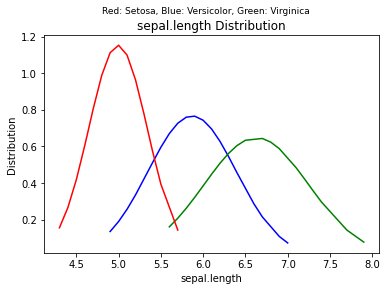

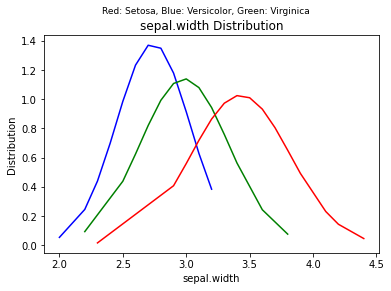

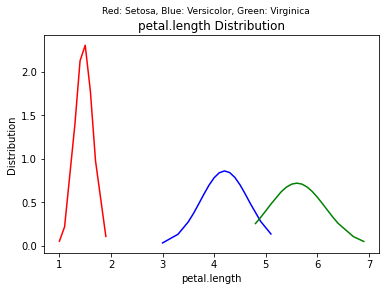

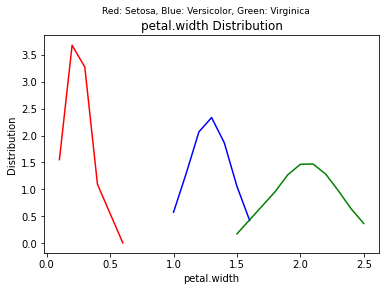

In [118]:
plot_column('sepal.length')
plot_column('sepal.width')
plot_column('petal.length')
plot_column('petal.width')

In [119]:
def dist(x, mean, sd):
  return math.exp((-0.5) * ((x-mean)/sd) ** 2) / sd * math.sqrt(2 * math.pi)

In [120]:
parameters

{'setosa': {'petal.length': {'mean': 1.473809523809524,
   'sd': 0.17116462452146058},
  'petal.width': {'mean': 0.2380952380952381, 'sd': 0.10109734732082629},
  'sepal.length': {'mean': 4.992857142857143, 'sd': 0.34598241682578795},
  'sepal.width': {'mean': 3.4285714285714284, 'sd': 0.38842126633253854}},
 'versicolor': {'petal.length': {'mean': 4.2025, 'sd': 0.4649165902583344},
  'petal.width': {'mean': 1.285, 'sd': 0.170293863659264},
  'sepal.length': {'mean': 5.87, 'sd': 0.520453451205576},
  'sepal.width': {'mean': 2.7375, 'sd': 0.28884162992804063}},
 'virginica': {'petal.length': {'mean': 5.602631578947368,
   'sd': 0.5557983506123292},
  'petal.width': {'mean': 2.0526315789473686, 'sd': 0.266850339779965},
  'sepal.length': {'mean': 6.628947368421053, 'sd': 0.6159623956303871},
  'sepal.width': {'mean': 2.9842105263157896, 'sd': 0.34992378767883053}}}

# Predict train set

In [121]:
counts = train.value_counts('variety')
counts

variety
Setosa        42
Versicolor    40
Virginica     38
dtype: int64

In [122]:
p = {'versicolor': 0, 'setosa': 0, 'virginica': 0}
p['versicolor'] = counts['Versicolor'] / len(train)
p['setosa'] = counts['Setosa'] / len(train)
p['virginica'] = counts['Virginica'] / len(train)
p

{'setosa': 0.35,
 'versicolor': 0.3333333333333333,
 'virginica': 0.31666666666666665}

In [123]:
train

,sepal.length,sepal.width,petal.length,petal.width,variety
84,5.4,3.0,4.5,1.5,Versicolor
122,7.7,2.8,6.7,2.0,Virginica
28,5.2,3.4,1.4,0.2,Setosa
24,4.8,3.4,1.9,0.2,Setosa
75,6.6,3.0,4.4,1.4,Versicolor
...,...,...,...,...,...
117,7.7,3.8,6.7,2.2,Virginica
59,5.2,2.7,3.9,1.4,Versicolor
45,4.8,3.0,1.4,0.3,Setosa
32,5.2,4.1,1.5,0.1,Setosa


In [124]:
def calc_row_prob(variety, row):
  prob = p[variety]
  prob *= dist(row['petal.length'], parameters[variety]['petal.length']['mean'], parameters[variety]['petal.length']['sd'])
  prob *= dist(row['petal.width'], parameters[variety]['petal.width']['mean'], parameters[variety]['petal.width']['sd'])
  prob *= dist(row['sepal.length'], parameters[variety]['sepal.length']['mean'], parameters[variety]['sepal.length']['sd'])
  prob *= dist(row['sepal.width'], parameters[variety]['sepal.width']['mean'], parameters[variety]['sepal.width']['sd'])
  return prob

In [125]:
train['predicted_versicolor'] = train.apply(lambda row: calc_row_prob('versicolor', row), axis=1)
train['predicted_setosa'] = train.apply(lambda row: calc_row_prob('setosa', row), axis=1)
train['predicted_virginica'] = train.apply(lambda row: calc_row_prob('virginica', row), axis=1)
train.head()

,sepal.length,sepal.width,petal.length,petal.width,variety,predicted_versicolor,predicted_setosa,predicted_virginica
84,5.4,3.0,4.5,1.5,Versicolor,1.787098e+02,3.165405e-99,8.739278e-01
122,7.7,2.8,6.7,2.0,Virginica,1.796584e-10,3.287600e-279,1.048526e+01
28,5.2,3.4,1.4,0.2,Setosa,6.857802e-16,4.204297e+03,1.718655e-22
24,4.8,3.4,1.9,0.2,Setosa,6.958826e-14,2.128938e+02,1.852790e-20
75,6.6,3.0,4.4,1.4,Versicolor,1.990022e+02,4.753912e-94,1.887157e+00


In [126]:
train['predicted'] = train[['predicted_versicolor','predicted_setosa','predicted_virginica']].idxmax(axis=1)
train['predicted'] = train['predicted'].str.replace('predicted_', '').str.capitalize()
train.head()

,sepal.length,sepal.width,petal.length,petal.width,variety,predicted_versicolor,predicted_setosa,predicted_virginica,predicted
84,5.4,3.0,4.5,1.5,Versicolor,1.787098e+02,3.165405e-99,8.739278e-01,Versicolor
122,7.7,2.8,6.7,2.0,Virginica,1.796584e-10,3.287600e-279,1.048526e+01,Virginica
28,5.2,3.4,1.4,0.2,Setosa,6.857802e-16,4.204297e+03,1.718655e-22,Setosa
24,4.8,3.4,1.9,0.2,Setosa,6.958826e-14,2.128938e+02,1.852790e-20,Setosa
75,6.6,3.0,4.4,1.4,Versicolor,1.990022e+02,4.753912e-94,1.887157e+00,Versicolor


In [127]:
train['is_prediction_true'] = train.apply(lambda row: row.variety == row.predicted, axis=1)
train.head()

,sepal.length,sepal.width,petal.length,petal.width,variety,predicted_versicolor,predicted_setosa,predicted_virginica,predicted,is_prediction_true
84,5.4,3.0,4.5,1.5,Versicolor,1.787098e+02,3.165405e-99,8.739278e-01,Versicolor,True
122,7.7,2.8,6.7,2.0,Virginica,1.796584e-10,3.287600e-279,1.048526e+01,Virginica,True
28,5.2,3.4,1.4,0.2,Setosa,6.857802e-16,4.204297e+03,1.718655e-22,Setosa,True
24,4.8,3.4,1.9,0.2,Setosa,6.958826e-14,2.128938e+02,1.852790e-20,Setosa,True
75,6.6,3.0,4.4,1.4,Versicolor,1.990022e+02,4.753912e-94,1.887157e+00,Versicolor,True


In [128]:
result = train.value_counts('is_prediction_true')
result

is_prediction_true
True     117
False      3
dtype: int64

In [129]:
train_accurecy = result[True] / (result[True] + result[False])
train_accurecy

0.975

# Predict test set

In [130]:
test['predicted_versicolor'] = test.apply(lambda row: calc_row_prob('versicolor', row), axis=1)
test['predicted_setosa'] = test.apply(lambda row: calc_row_prob('setosa', row), axis=1)
test['predicted_virginica'] = test.apply(lambda row: calc_row_prob('virginica', row), axis=1)
test.head()

,sepal.length,sepal.width,petal.length,petal.width,variety,predicted_versicolor,predicted_setosa,predicted_virginica
1,4.9,3.0,1.4,0.2,Setosa,2.539747e-15,2646.698854,9.979927e-23
7,5.0,3.4,1.5,0.2,Setosa,1.387778e-15,5454.216604,2.944262e-22
14,5.8,4.0,1.2,0.2,Setosa,1.046068e-19,34.326146,1.894451e-24
16,5.4,3.9,1.3,0.4,Setosa,1.049567e-15,235.779528,7.918709e-22
23,5.1,3.3,1.7,0.5,Setosa,6.904336e-10,78.118181,1.047449e-17


In [131]:
test['predicted'] = test[['predicted_versicolor','predicted_setosa','predicted_virginica']].idxmax(axis=1)
test['predicted'] = test['predicted'].str.replace('predicted_', '').str.capitalize()
test.head()

,sepal.length,sepal.width,petal.length,petal.width,variety,predicted_versicolor,predicted_setosa,predicted_virginica,predicted
1,4.9,3.0,1.4,0.2,Setosa,2.539747e-15,2646.698854,9.979927e-23,Setosa
7,5.0,3.4,1.5,0.2,Setosa,1.387778e-15,5454.216604,2.944262e-22,Setosa
14,5.8,4.0,1.2,0.2,Setosa,1.046068e-19,34.326146,1.894451e-24,Setosa
16,5.4,3.9,1.3,0.4,Setosa,1.049567e-15,235.779528,7.918709e-22,Setosa
23,5.1,3.3,1.7,0.5,Setosa,6.904336e-10,78.118181,1.047449e-17,Setosa


In [132]:
test['is_prediction_true'] = test.apply(lambda row: row.variety == row.predicted, axis=1)
test.head()

,sepal.length,sepal.width,petal.length,petal.width,variety,predicted_versicolor,predicted_setosa,predicted_virginica,predicted,is_prediction_true
1,4.9,3.0,1.4,0.2,Setosa,2.539747e-15,2646.698854,9.979927e-23,Setosa,True
7,5.0,3.4,1.5,0.2,Setosa,1.387778e-15,5454.216604,2.944262e-22,Setosa,True
14,5.8,4.0,1.2,0.2,Setosa,1.046068e-19,34.326146,1.894451e-24,Setosa,True
16,5.4,3.9,1.3,0.4,Setosa,1.049567e-15,235.779528,7.918709e-22,Setosa,True
23,5.1,3.3,1.7,0.5,Setosa,6.904336e-10,78.118181,1.047449e-17,Setosa,True


In [133]:
result = test.value_counts('is_prediction_true')
result

is_prediction_true
True     25
False     5
dtype: int64

In [134]:
test_accurecy = result[True] / (result[True] + result[False])
test_accurecy

0.8333333333333334